In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
advertising = pd.read_csv('/Users/Nian/Desktop/learn/marketing-ad-click-prediction/data/advertising.csv')
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [3]:
advertising.info()
print()
print(advertising.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1018 non-null   float64
 1   Age                       1018 non-null   int64  
 2   Area Income               1018 non-null   float64
 3   Daily Internet Usage      1018 non-null   float64
 4   Ad Topic Line             1018 non-null   object 
 5   City                      1018 non-null   object 
 6   Male                      1018 non-null   int64  
 7   Country                   1018 non-null   object 
 8   Timestamp                 1018 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False

In [4]:
advertising = advertising.dropna(axis = 0)
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1014 non-null   float64
 1   Age                       1014 non-null   int64  
 2   Area Income               1014 non-null   float64
 3   Daily Internet Usage      1014 non-null   float64
 4   Ad Topic Line             1014 non-null   object 
 5   City                      1014 non-null   object 
 6   Male                      1014 non-null   int64  
 7   Country                   1014 non-null   object 
 8   Timestamp                 1014 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 87.1+ KB


In [6]:
print("Duplicated records: ", advertising.duplicated().sum())

Duplicated records:  7


In [7]:
advertising = advertising.drop_duplicates()
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1007 non-null   float64
 1   Age                       1007 non-null   int64  
 2   Area Income               1007 non-null   float64
 3   Daily Internet Usage      1007 non-null   float64
 4   Ad Topic Line             1007 non-null   object 
 5   City                      1007 non-null   object 
 6   Male                      1007 non-null   int64  
 7   Country                   1007 non-null   object 
 8   Timestamp                 1007 non-null   object 
 9   Clicked on Ad             1007 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 86.5+ KB


In [8]:
click_rate = advertising["Clicked on Ad"].value_counts() / advertising.shape[0]
click_rate

1.0    0.502483
0.0    0.497517
Name: Clicked on Ad, dtype: float64

In [9]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


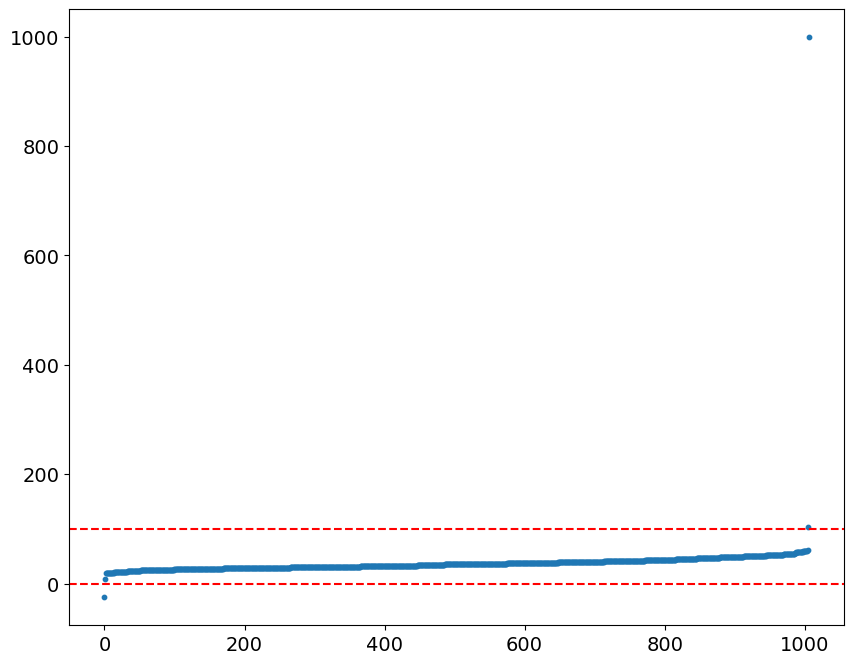

In [10]:
sorted_age = sorted(advertising['Age'])
idx = []
for i in range(len(sorted_age)):
    idx.append(i)

x = idx
y = sorted_age

plt.rcParams["font.size"] = 14
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=10)
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=100, linestyle='--', color='r')
plt.savefig('age_range.png', bbox_inches='tight')

In [11]:
advertising[(advertising['Age'] < 18) | (advertising['Age'] > 100)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
294,56.01,-25,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59,1.0
495,50.60,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.20,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [12]:
advertising = advertising[(advertising['Age'] >= 18) & (advertising['Age'] < 100)]
print (advertising.shape)
advertising.head()

(1003, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [13]:
advertising['delta'] = advertising["Daily Internet Usage"] - advertising["Daily Time Spent on Site"]
advertising[advertising['delta'] < 0]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,delta
114,46.13,46,37838.72,23.64,Horizontal hybrid challenge,New Rachel,1,Guyana,2016-01-09 5:44,1.0,-22.49
331,86.78,30,54952.42,70.13,Fundamental zero tolerance solution,New Steve,1,United States of America,2016-02-18 23:08,0.0,-16.65
404,66.99,47,27262.51,24.44,Operative actuating installation,Lopezberg,1,Tanzania,2016-06-15 11:56,1.0,-42.55


In [14]:
sum(advertising['delta'] < 0)

3

In [15]:
advertising = advertising[advertising['delta'] >= 0]
advertising = advertising.drop('delta', axis=1)
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [16]:
import math

def creating_boxplots(size, target, features, data, save_as):
    count = len(features)
    plt.rcParams["font.size"] = 14
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(math.ceil(count/2), 2, i+1)
        sns.boxplot(x=target, y=features[i], data=data)
    if save_as[-4:] == ".png":
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.savefig(save_as+".png", bbox_inches='tight')
                
def creating_distplots(size, features, data, save_as):
    count = len(features)
    plt.rcParams["font.size"] = 14
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(math.ceil(count/2), 2, i+1)
        sns.distplot(data[features[i]])
    if save_as[-4:] == ".png":
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.savefig(save_as+".png", bbox_inches='tight')
        
def creating_heatmap(data, save_as):
    plt.rcParams["font.size"] = 14
    corr = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)
    plt.xticks(rotation=45)
    if save_as[-4:] == ".png":
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.savefig(save_as+".png", bbox_inches='tight')
    print(corr)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

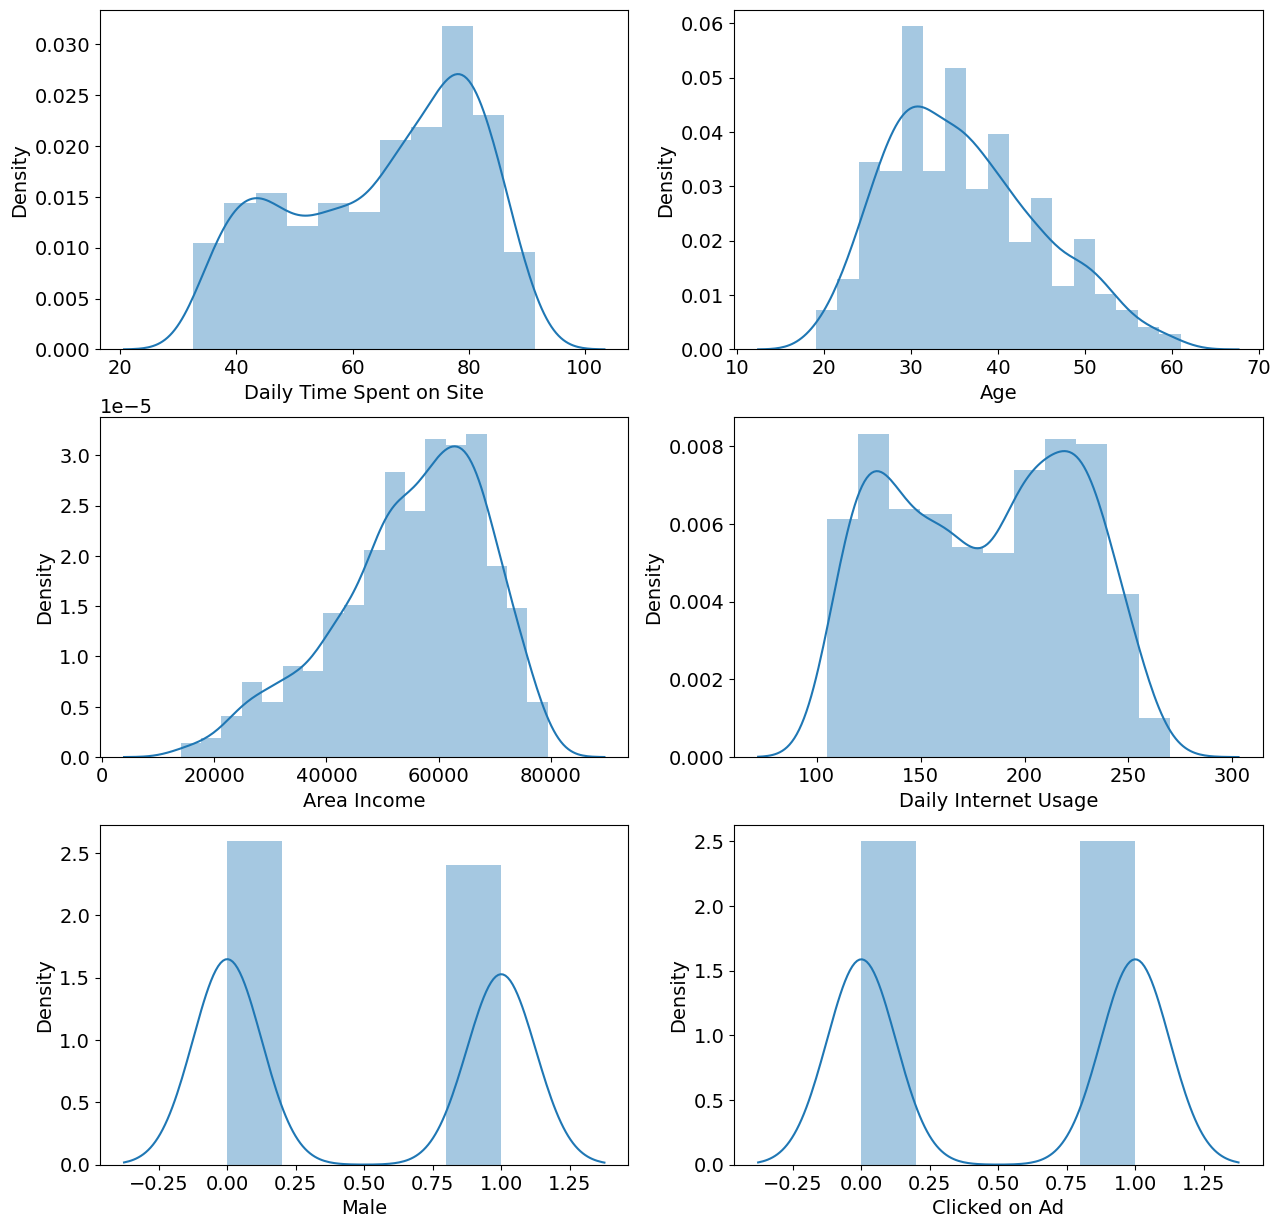

In [17]:
num_vars = advertising.select_dtypes(exclude=['object', 'datetime64']).columns
creating_distplots((15,15), num_vars, advertising, "distplot-numerical_variables.png")

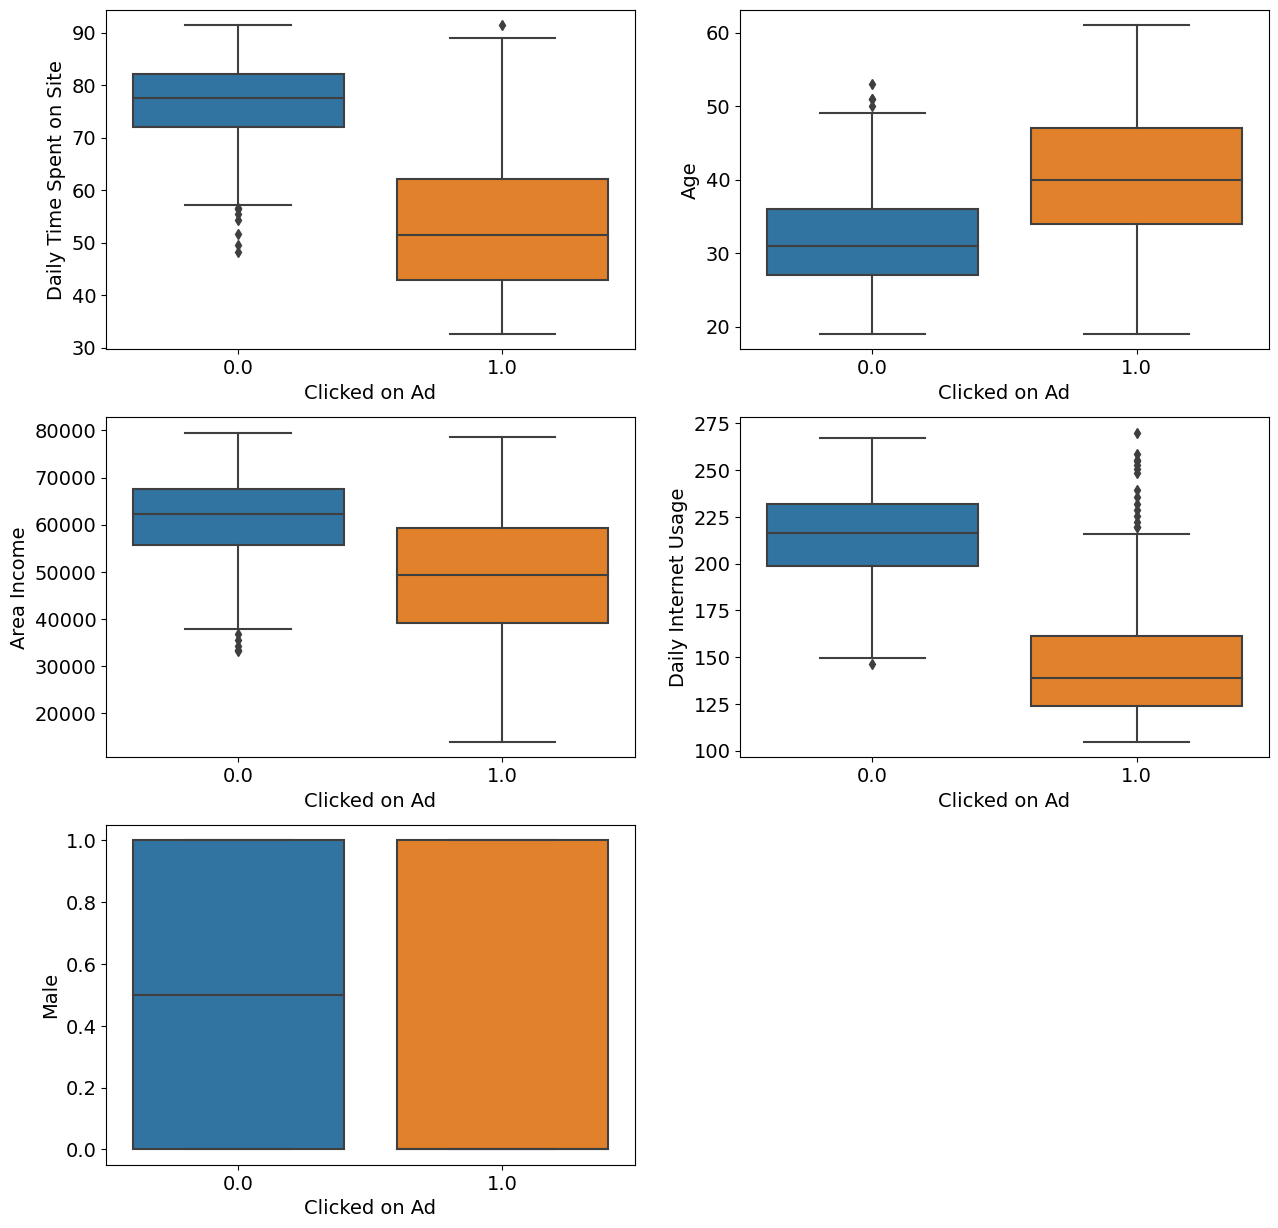

In [18]:
target = "Clicked on Ad"
num_vars1 = num_vars.drop(labels="Clicked on Ad")
creating_boxplots((15,15), target, num_vars1, advertising, "boxplot-numerical_variables.png")

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad   

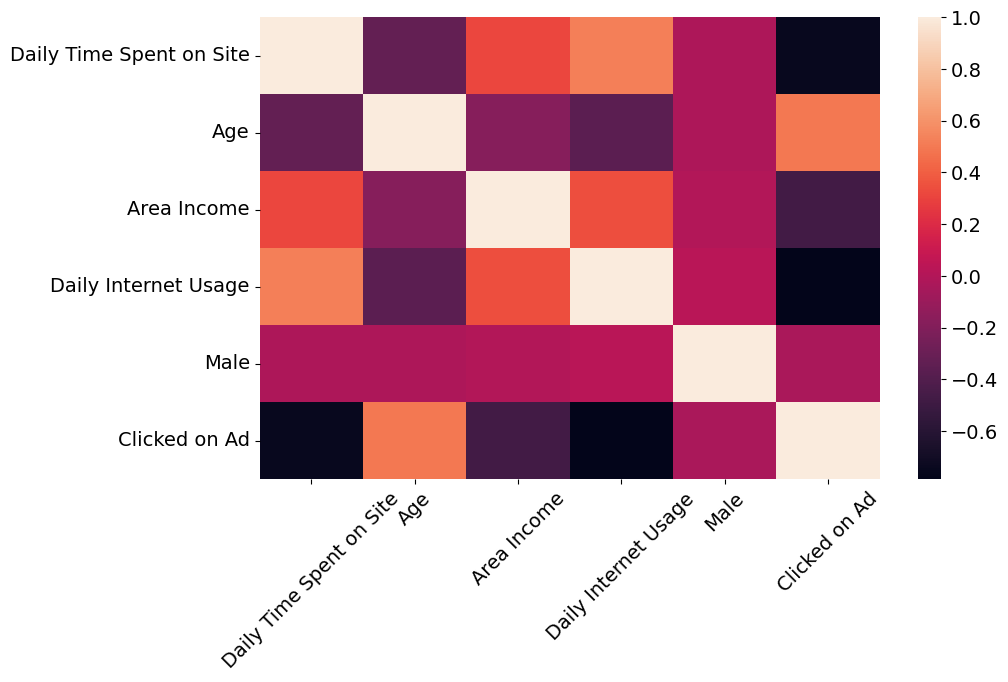

In [19]:
creating_heatmap(advertising, "correlation-numerical_variables.png")

In [20]:
def creating_plots(size, features, data, save_as):
    click_yes = data["Clicked on Ad"] == 1
    click_no = data["Clicked on Ad"] == 0
    labels = ["Click", "No Click"]
    
    plt.rcParams["font.size"] = 14
    plt.figure(figsize=size)
    
    count = len(features)
    for feature in features:
        plt.subplot(math.ceil(count/2), 2, features.index(feature)+1)
        sns.distplot(data[feature][click_yes], label=labels[0], color="b")
        sns.distplot(data[feature][click_no], label=labels[1], color="y")
        plt.axvline(data[feature][click_yes].mean(), linestyle="--", color="b")
        plt.axvline(data[feature][click_no].mean(), linestyle="--", color="y")
        plt.legend()
        
    if save_as[-4:] == ".png":
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.savefig(save_as+".png", bbox_inches='tight')

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

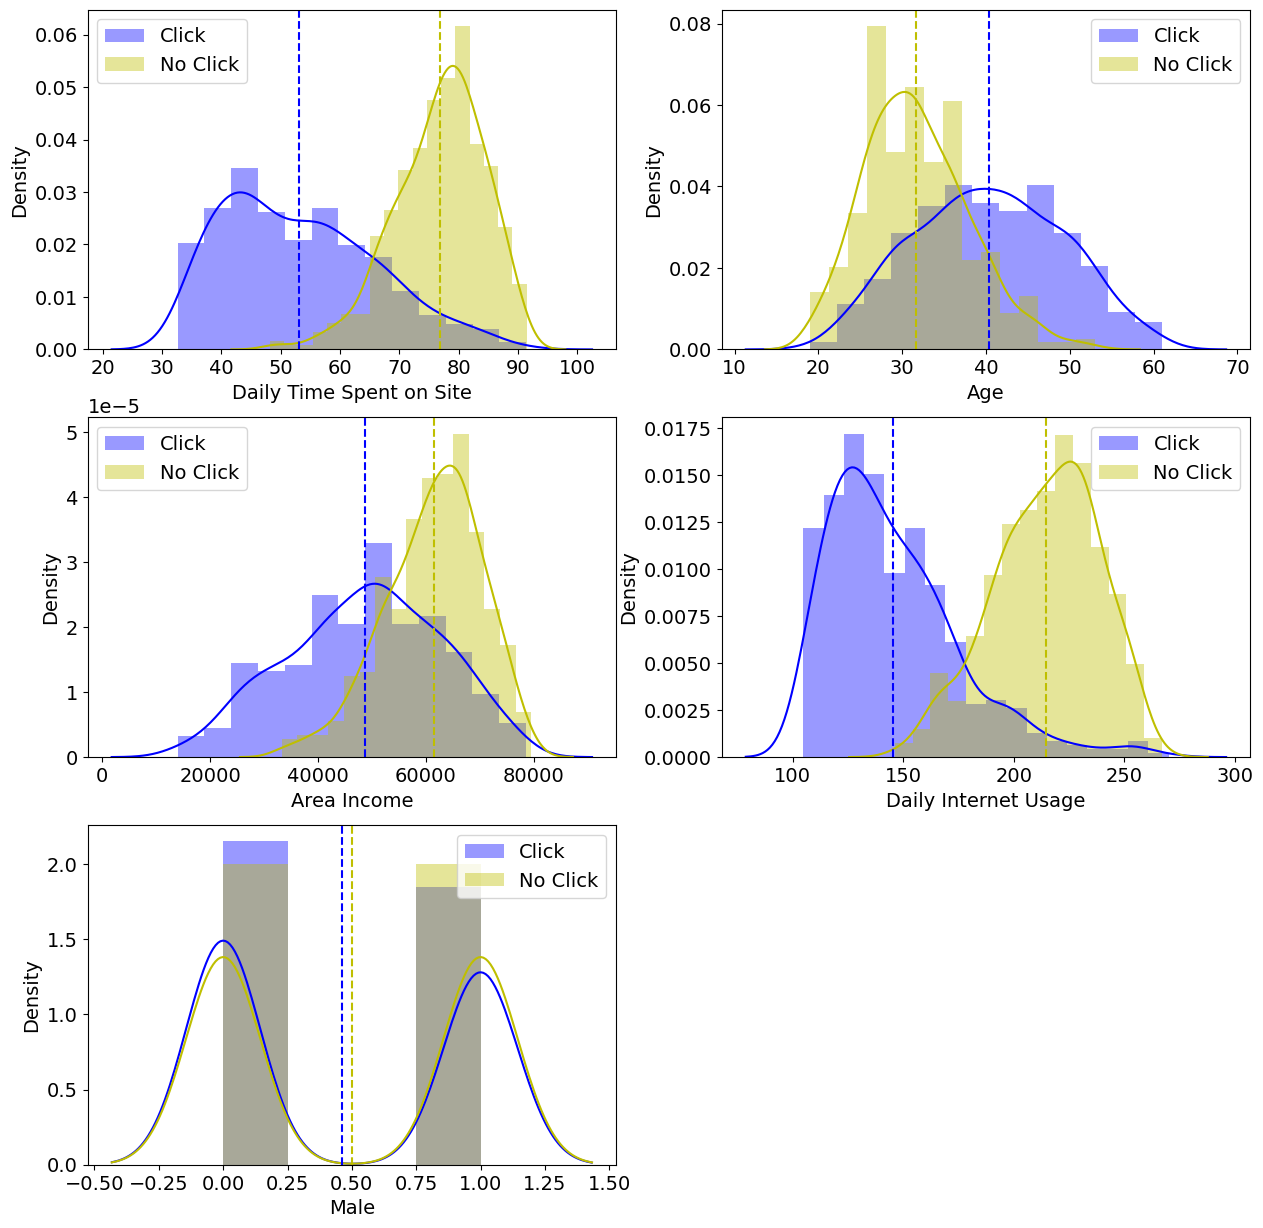

In [21]:
features = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]
creating_plots((15, 15), features, advertising, "distplot-numerical_variables-target.png")

<Figure size 640x480 with 0 Axes>

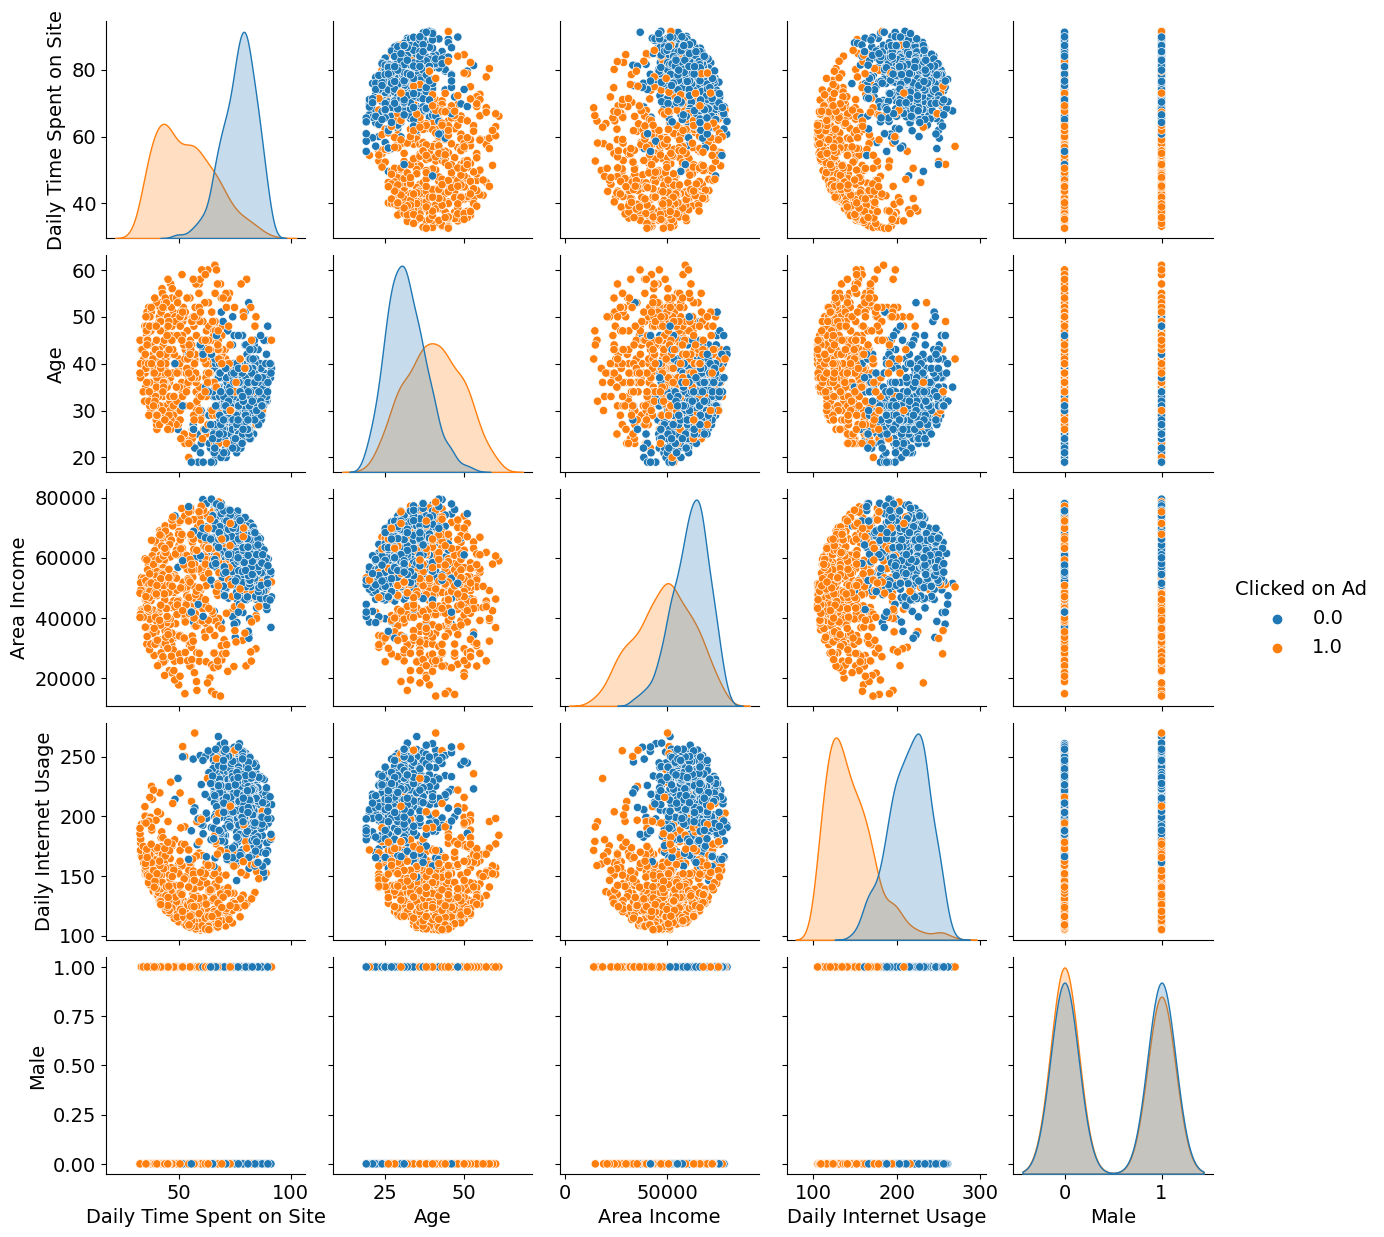

In [22]:
plt.rcParams["font.size"] = 14
plt.figure()
sns.pairplot(data=advertising[num_vars],
            hue="Clicked on Ad",
            dropna=True)
plt.savefig("pairplot-numerical_variables-target.png", bbox_inches='tight')

In [23]:
print("Count of unique values of City feature: ", advertising["City"].nunique())
print("Count of number of values of City feature: ", advertising["City"].count())

Count of unique values of City feature:  969
Count of number of values of City feature:  1000


In [24]:
print("Count of unique values of feature Country: ", advertising["Country"].nunique())
country_count = pd.crosstab(index=advertising["Country"], columns="count")
country_count.describe()

Count of unique values of feature Country:  237


col_0,count
count,237.000000
mean,4.219409
std,1.837222
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,9.000000


In [25]:
clicked_country_count = pd.crosstab(advertising["Country"],
                                    advertising["Clicked on Ad"],
                                    rownames=['Country'],
                                    colnames=["Clicked on Ad"])
clicked_country_count.sort_values(1, 0, ascending=False).head(10)

/var/folders/zt/hhvgl9sd4cn1zccq7pn35wxc0000gn/T/ipykernel_84783/2140200800.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  clicked_country_count.sort_values(1, 0, ascending=False).head(10)


Clicked on Ad,0.0,1.0
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [26]:
random_state = 42
target = "Clicked on Ad"

X, y = advertising.drop([target], axis = 1), advertising[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 9)
(800,)
(200, 9)
(200,)


In [27]:
X_train = X_train.drop(["Ad Topic Line", "City", "Timestamp"], axis=1)
X_train.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
29,76.02,22,46179.97,209.82,0,Bouvet Island (Bouvetoya)
546,73.57,30,70377.23,212.38,0,Uruguay
707,68.25,33,76480.16,198.86,1,Vanuatu
568,56.20,49,53549.94,114.85,1,Bahamas
850,63.11,34,63107.88,254.94,1,Micronesia


In [28]:
X_test = X_test.drop(["Ad Topic Line", "City", "Timestamp"], axis=1)
X_test.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
532,46.61,42,65856.74,136.18,0,Ethiopia
750,79.80,28,57179.91,229.88,1,Bahamas
753,82.37,30,63664.32,207.44,0,Tonga
672,76.42,26,60315.19,223.16,1,Netherlands Antilles
420,48.09,33,19345.36,180.42,0,Heard Island and McDonald Islands


In [29]:
categorical_vars = ["Country"]
numerical_vars = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]

scaler = MinMaxScaler()

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [30]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
29,0.738812,0.071429,0.491438,0.635427,0.0,Bouvet Island (Bouvetoya)
546,0.697124,0.261905,0.860928,0.650946,0.0,Uruguay
707,0.606602,0.333333,0.954119,0.568986,1.0,Vanuatu
568,0.401565,0.714286,0.603977,0.059711,1.0,Bahamas
850,0.519142,0.357143,0.749926,0.908948,1.0,Micronesia


In [31]:
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
532,0.238387,0.547619,0.791901,0.189016,0.0,Ethiopia
750,0.803131,0.214286,0.659406,0.757032,1.0,Bahamas
753,0.846861,0.261905,0.758423,0.620999,0.0,Tonga
672,0.745619,0.166667,0.707282,0.716295,1.0,Netherlands Antilles
420,0.263570,0.333333,0.081677,0.457202,0.0,Heard Island and McDonald Islands


In [32]:
X_train_original = X_train
countries = X_train['Country'].unique()
countries = np.append(countries, 'Others')
countries
le = LabelEncoder()
le.fit(countries)
X_train['Country'] = le.transform(X_train['Country'])
le.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Bouvet Island (Bouvetoya)', 'Brazil',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Chad', 'Chile', 'China', 'Christmas Island',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

In [33]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
29,0.738812,0.071429,0.491438,0.635427,0.0,26
546,0.697124,0.261905,0.860928,0.650946,0.0,223
707,0.606602,0.333333,0.954119,0.568986,1.0,225
568,0.401565,0.714286,0.603977,0.059711,1.0,14
850,0.519142,0.357143,0.749926,0.908948,1.0,133


In [34]:
X_test_original = X_test
X_test['Country'] = X_test['Country'].map(lambda s: 'Others' if s not in le.classes_ else s)
X_test[X_test['Country'] == 'Others']

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
633,0.836311,0.119048,0.590329,0.515761,1.0,Others
674,0.232772,0.166667,0.550615,0.750364,1.0,Others
880,0.117917,0.333333,0.400794,0.225570,1.0,Others
647,0.448358,0.857143,0.645095,0.159372,1.0,Others
837,0.690999,0.261905,0.565244,0.894762,1.0,Others
86,0.764165,0.404762,0.910144,0.579231,0.0,Others
907,0.087460,0.500000,0.790630,0.521035,0.0,Others
655,0.739663,0.404762,0.825140,0.791465,0.0,Others
815,0.352731,0.357143,0.462352,0.040192,1.0,Others


In [35]:
X_test['Country'] = le.transform(X_test['Country'])
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
532,0.238387,0.547619,0.791901,0.189016,0.0,61
750,0.803131,0.214286,0.659406,0.757032,1.0,14
753,0.846861,0.261905,0.758423,0.620999,0.0,209
672,0.745619,0.166667,0.707282,0.716295,1.0,146
420,0.263570,0.333333,0.081677,0.457202,0.0,87


In [36]:
# Logitstic Regression
def search_parameters(model, parameters, num_folds, precisions):
    gs = GridSearchCV(model, param_grid=parameters, scoring='precision', n_jobs=-1, cv=num_folds)
    
    gs.fit(X_train, y_train)
    precisions[gs.best_estimator_] = gs.best_score_
    
    print("\nOptimized Model:\n---------")
    print("Evaluation score function:", gs.scorer_, "=", gs.best_score_)
    print(gs.best_estimator_)

In [37]:
num_folds = 4
precisions = {}

model = LogisticRegression(random_state=random_state)
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
search_parameters(model, parameters, num_folds, precisions)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"


Optimized Model:
---------
Evaluation score function: make_scorer(precision_score, average=binary) = 0.9921805678793256
LogisticRegression(C=0.1, random_state=42)


/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [38]:
parameters = {"C": [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]}
search_parameters(model, parameters, num_folds, precisions)


Optimized Model:
---------
Evaluation score function: make_scorer(precision_score, average=binary) = 0.9922899204814098
LogisticRegression(C=0.5, random_state=42)


/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [39]:
model_rf = RandomForestClassifier(oob_score=True, random_state=42)
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)

print("Precision score:", round(precision_score(y_train, y_train_pred), 2))
print("OOB score:", round(model_rf.oob_score_, 2))

Precision score: 1.0
OOB score: 0.96


Depth = 5
Precision score: 0.9974424552429667
OOB score: 0.96375


Depth = 6
Precision score: 1.0
OOB score: 0.96


Depth = 7
Precision score: 1.0
OOB score: 0.96


Depth = 8
Precision score: 1.0
OOB score: 0.9575


Depth = 9
Precision score: 1.0
OOB score: 0.96


Depth = 10
Precision score: 1.0
OOB score: 0.96125


Depth = 11
Precision score: 1.0
OOB score: 0.96


Depth = 12
Precision score: 1.0
OOB score: 0.96


Depth = 13
Precision score: 1.0
OOB score: 0.96


Depth = 14
Precision score: 1.0
OOB score: 0.96




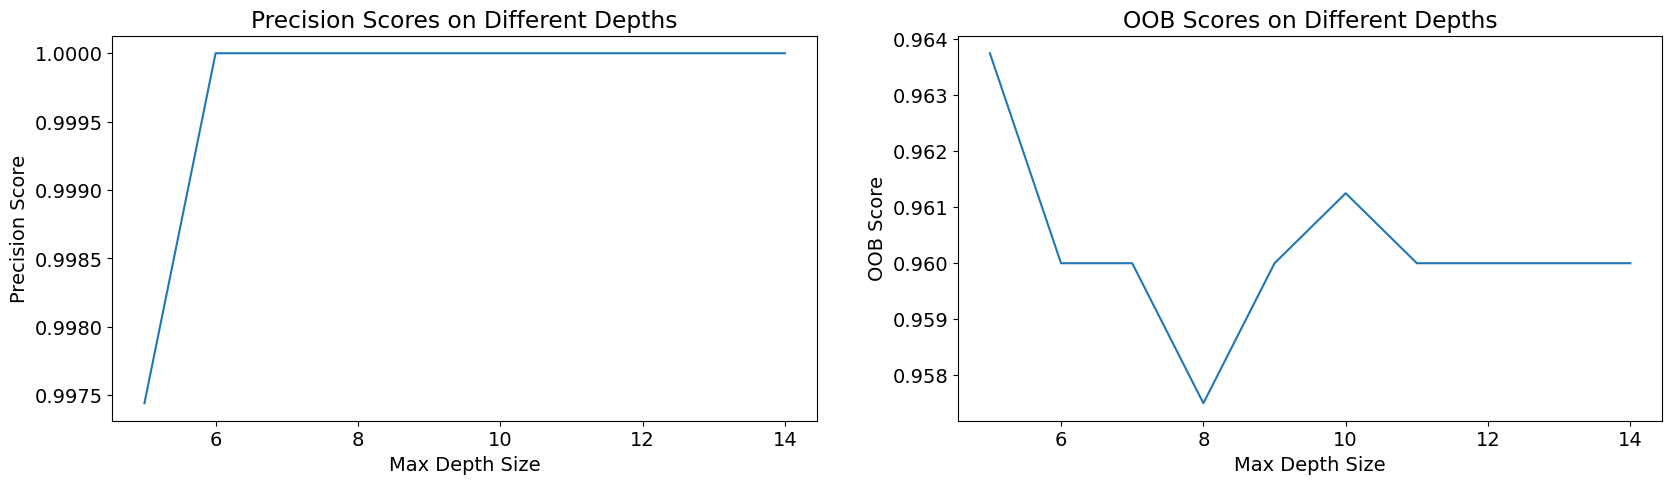

In [40]:
oob_scores = []
precision_scores = []
max_depth_sizes = np.arange(5, 15, 1)

for depth in max_depth_sizes:
    model_rf = RandomForestClassifier(max_depth=depth, oob_score=True, n_jobs=-1, random_state=42)
    model_rf.fit(X_train, y_train)
    print("Depth =", depth)
    y_train_pred = model_rf.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    oob_score = model_rf.oob_score_
    print('Precision score:', precision_train)
    print('OOB score:', oob_score)
    oob_scores.append(oob_score)
    precision_scores.append(precision_train)
    print("\n")

plt.rcParams["font.size"] = 14
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(max_depth_sizes, precision_scores)
plt.xlabel('Max Depth Size')
plt.ylabel('Precision Score')
plt.title('Precision Scores on Different Depths')

plt.subplot(1, 2, 2)
plt.plot(max_depth_sizes, oob_scores)
plt.xlabel('Max Depth Size')
plt.ylabel('OOB Score')
plt.title('OOB Scores on Different Depths')
plt.show()

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserW

Number of trees: 1
Precision score: 0.9725
OOB score: 0.66


Number of trees: 2
Precision score: 0.9947780678851175
OOB score: 0.76


Number of trees: 3
Precision score: 0.992462311557789
OOB score: 0.825


Number of trees: 4
Precision score: 0.9949494949494949
OOB score: 0.8625


Number of trees: 5
Precision score: 0.9900249376558603
OOB score: 0.88375


Number of trees: 15
Precision score: 1.0
OOB score: 0.95375


Number of trees: 20
Precision score: 1.0
OOB score: 0.9525


Number of trees: 25
Precision score: 1.0
OOB score: 0.95125


Number of trees: 30
Precision score: 1.0
OOB score: 0.9525


Number of trees: 35
Precision score: 1.0
OOB score: 0.955


Number of trees: 40
Precision score: 1.0
OOB score: 0.955


Number of trees: 50
Precision score: 1.0
OOB score: 0.95875


Number of trees: 60
Precision score: 1.0
OOB score: 0.9575


Number of trees: 70
Precision score: 1.0
OOB score: 0.95875


Number of trees: 100
Precision score: 1.0
OOB score: 0.96




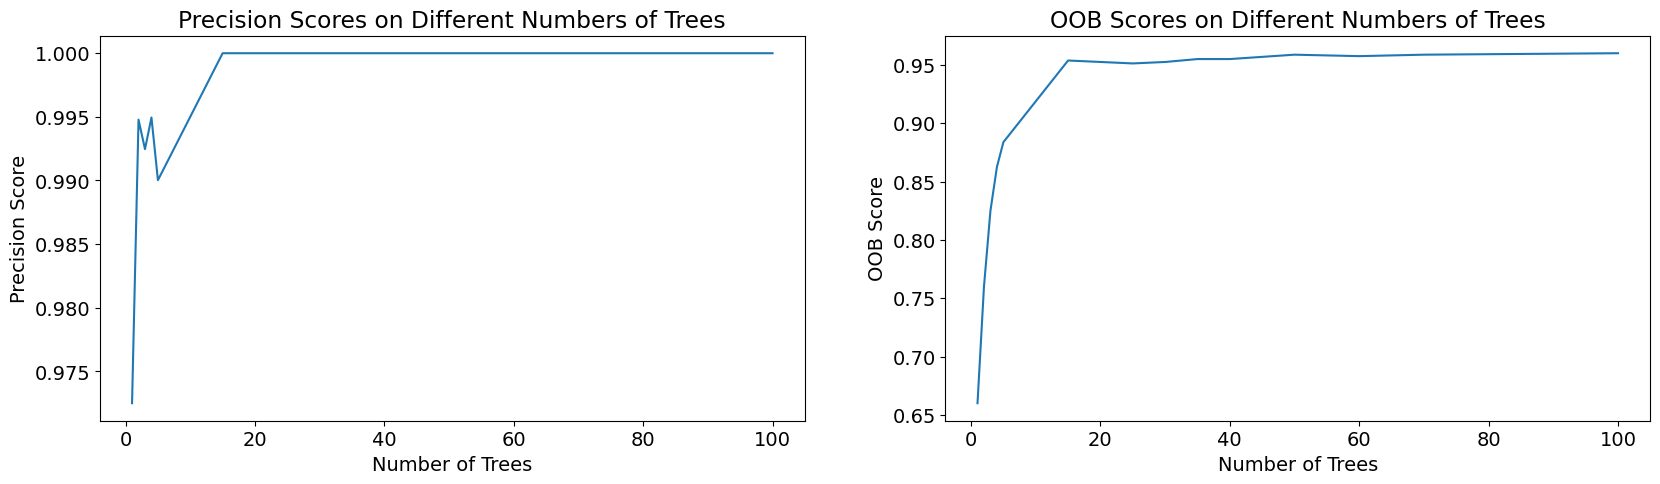

In [41]:
oob_scores = []
precision_scores = []
n_estimator_options = [1, 2, 3, 4, 5, 15, 20, 25, 30, 35, 40, 50, 60, 70, 100]

for trees in n_estimator_options:
    model_rf = RandomForestClassifier(n_estimators=trees, oob_score=True, n_jobs=-1, random_state=42)
    model_rf.fit(X_train, y_train)
    print("Number of trees:", trees)
    y_train_pred = model_rf.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    oob_score = model_rf.oob_score_
    print('Precision score:', precision_train)
    print('OOB score:', oob_score)
    oob_scores.append(oob_score)
    precision_scores.append(precision_train)
    print("\n")

plt.rcParams["font.size"] = 14
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimator_options, precision_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Precision Score')
plt.title('Precision Scores on Different Numbers of Trees')

plt.subplot(1, 2, 2)
plt.plot(n_estimator_options, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Scores on Different Numbers of Trees')
plt.show()

In [42]:
oob_scores = []
precision_scores = []
max_features_options = ["auto", None, "log2"]

for max_features in max_features_options:
    model_rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model_rf.fit(X_train, y_train)
    print("Max features:", max_features)
    y_train_pred = model_rf.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    oob_score = model_rf.oob_score_
    print('Precision score:', precision_train)
    print('OOB score:', oob_score)
    oob_scores.append(oob_score)
    precision_scores.append(precision_train)
    print("\n")

Max features: auto
Precision score: 1.0
OOB score: 0.96


Max features: None
Precision score: 1.0
OOB score: 0.9525


Max features: log2
Precision score: 1.0
OOB score: 0.96




Min Samples Leaf: 1
Precision score: 1.0
OOB score: 0.96


Min Samples Leaf: 2
Precision score: 0.9974619289340102
OOB score: 0.9625


Min Samples Leaf: 3
Precision score: 0.9898734177215189
OOB score: 0.96


Min Samples Leaf: 4
Precision score: 0.9847328244274809
OOB score: 0.96


Min Samples Leaf: 5
Precision score: 0.9797979797979798
OOB score: 0.9575


Min Samples Leaf: 6
Precision score: 0.9772727272727273
OOB score: 0.9575


Min Samples Leaf: 7
Precision score: 0.9746835443037974
OOB score: 0.95875


Min Samples Leaf: 8
Precision score: 0.9723618090452262
OOB score: 0.95875


Min Samples Leaf: 9
Precision score: 0.9699248120300752
OOB score: 0.96


Min Samples Leaf: 10
Precision score: 0.9722921914357683
OOB score: 0.9575


Min Samples Leaf: 15
Precision score: 0.9671717171717171
OOB score: 0.9525


Min Samples Leaf: 20
Precision score: 0.964824120603015
OOB score: 0.9525




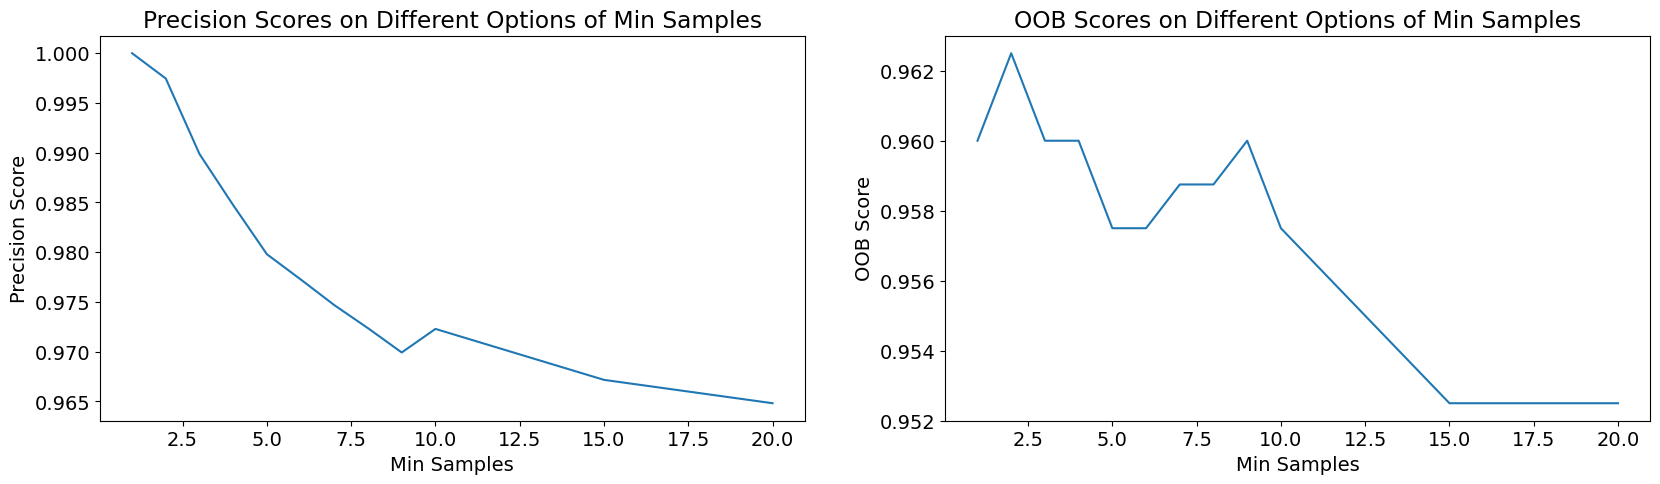

In [43]:
oob_scores = []
precision_scores = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for min_samples in min_samples_leaf_options:
    model_rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42, min_samples_leaf=min_samples)
    model_rf.fit(X_train, y_train)
    print("Min Samples Leaf:", min_samples)
    y_train_pred = model_rf.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    oob_score = model_rf.oob_score_
    print('Precision score:', precision_train)
    print('OOB score:', oob_score)
    oob_scores.append(oob_score)
    precision_scores.append(precision_train)
    print("\n")

plt.rcParams["font.size"] = 14
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(min_samples_leaf_options, precision_scores)
plt.xlabel('Min Samples')
plt.ylabel('Precision Score')
plt.title('Precision Scores on Different Options of Min Samples')

plt.subplot(1, 2, 2)
plt.plot(min_samples_leaf_options, oob_scores)
plt.xlabel('Min Samples')
plt.ylabel('OOB Score')
plt.title('OOB Scores on Different Options of Min Samples')
plt.show()

In [44]:
# Gridsearch
model = RandomForestClassifier(oob_score=True, random_state=random_state)
parameters = {"n_estimators":[20, 40, 60, 80, 100],
             "max_depth":[7, 8, 9, 10, 11, 12, 13, 14],
             "min_samples_leaf":[2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
             "max_features":["auto", None, "log2"]}
score_func = 'precision'
search_parameters(model, parameters, num_folds, precisions)


Optimized Model:
---------
Evaluation score function: make_scorer(precision_score, average=binary) = 0.96447062204864
RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=60,
                       oob_score=True, random_state=42)


In [45]:
model = max(precisions, key=precisions.get)
print('\nPredictions calculated using model with highest precision score:')
print(model)

model.fit(X_train, y_train)


Predictions calculated using model with highest precision score:
LogisticRegression(C=0.5, random_state=42)


LogisticRegression(C=0.5, random_state=42)

In [46]:
features = X_train.columns

coefs = {}

for coef, feature in zip(model.coef_[0], features):
    coefs[feature] = coef
    
print(coefs)

{'Daily Time Spent on Site': -4.413248395412997, 'Age': 2.5302440322948745, 'Area Income': -2.8291525048769133, 'Daily Internet Usage': -4.848679641480495, 'Male': -0.34184566719203363, 'Country': 0.0009018186126823768}


In [47]:
y_train_pred = model.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_train_pred)

print("The confusion matrix:\n", conf_matrix)
print("Precision Score:", precision_score(y_train, y_train_pred))
print("Recall Score:", recall_score(y_train, y_train_pred))

The confusion matrix:
 [[398   3]
 [ 23 376]]
Precision Score: 0.9920844327176781
Recall Score: 0.9423558897243107


In [48]:
def summary_metrics(y, y_pred):
    conf_matrix = confusion_matrix(y, y_pred)
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    TP = conf_matrix[1,1]
    
    print("Confusion Matrix:\n", conf_matrix)
    
    print("Accuracy:", round(accuracy_score(y, y_pred), 2))
    print("Precision:", round(precision_score(y, y_pred), 2))
    print("Recall:", round(recall_score(y, y_pred), 2))
    
    print("\nConversion to Montary Values:\n")
    print("True Positive:", round((float(TP) * 100), 2), "CAD")
    print("False Positive:", round((float(FP) * -1050), 2), "CAD")
    print("False Negative:", round((float(FN) * 1100), 2), "CAD")
    print("True Negative:", round((float(TN) * 0), 2), "CAD")
    
    investment_return = (TP * 100) + (FP * -1050) + (FN * 1100) + (TN * 0)
    print("Profit:", round(float(investment_return),2), "$")    

In [49]:
summary_metrics(y_train, y_train_pred)

Confusion Matrix:
 [[398   3]
 [ 23 376]]
Accuracy: 0.97
Precision: 0.99
Recall: 0.94

Conversion to Montary Values:

True Positive: 37600.0 CAD
False Positive: -3150.0 CAD
False Negative: 25300.0 CAD
True Negative: 0.0 CAD
Profit: 59750.0 $


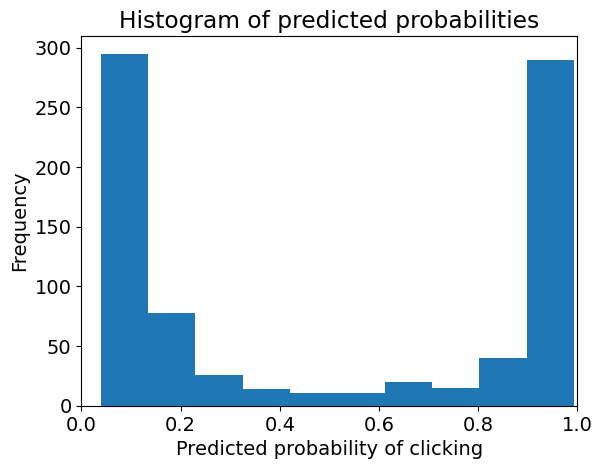

In [50]:
y_train_prob = model.predict_proba(X_train)[:,1]

plt.rcParams["font.size"] = 14
plt.hist(y_train_prob, bins=10)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of clicking")
plt.ylabel("Frequency")
plt.savefig("histogram-train1.png", bbox_inches='tight')

In [51]:
y_train_prob = model.predict_proba(X_train)[:,1]
y_train_pred_rev = np.where(y_train_prob < 0.65, 0, 1)
summary_metrics(y_train, y_train_pred_rev)

Confusion Matrix:
 [[400   1]
 [ 45 354]]
Accuracy: 0.94
Precision: 1.0
Recall: 0.89

Conversion to Montary Values:

True Positive: 35400.0 CAD
False Positive: -1050.0 CAD
False Negative: 49500.0 CAD
True Negative: 0.0 CAD
Profit: 83850.0 $


In [52]:
y_test_pred = model.predict(X_test)
summary_metrics(y_test, y_test_pred)

Confusion Matrix:
 [[97  2]
 [ 4 97]]
Accuracy: 0.97
Precision: 0.98
Recall: 0.96

Conversion to Montary Values:

True Positive: 9700.0 CAD
False Positive: -2100.0 CAD
False Negative: 4400.0 CAD
True Negative: 0.0 CAD
Profit: 12000.0 $


In [53]:
y_test_prob = model.predict_proba(X_test)[:,1]
y_test_pred_rev = np.where(y_test_prob < 0.65, 0, 1)
summary_metrics(y_test, y_test_pred_rev)

Confusion Matrix:
 [[99  0]
 [ 8 93]]
Accuracy: 0.96
Precision: 1.0
Recall: 0.92

Conversion to Montary Values:

True Positive: 9300.0 CAD
False Positive: -0.0 CAD
False Negative: 8800.0 CAD
True Negative: 0.0 CAD
Profit: 18100.0 $
